In [643]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [644]:
#get current working directory
os.getcwd()

'D:\\SALES DATASETS'

In [645]:
#change the current workign directory to directory of the dataset
os.chdir('D:\\SALES DATASETS')

In [646]:
os.getcwd()

'D:\\SALES DATASETS'

In [647]:
#read and view data 
data=pd.read_csv('company.csv')
data.head()

,Month,FY,Location,BtoB/BtoC,Product Code,Sale,Gross Margin
0,Apr-19,2019-20,Delhi,BtoB,E0028M,"4,67,845.00","78,108.71"
1,Apr-19,2019-20,Mumbai,BtoB,E0028M,"3,44,195.00","2,12,540.41"
2,Apr-19,2019-20,Surat,BtoB,E0028M,"4,67,845.00","1,36,844.66"
3,Apr-19,2019-20,Mumbai,BtoC,E0028M,"12,667.00","5,516.48"
4,Apr-19,2019-20,Delhi,BtoC,E0028M,"2,49,520.00","32,437.60"


In [648]:
data.shape

(756, 7)

In [649]:
data.apply(lambda x:len(x.unique()))

Month            24
FY                2
Location          4
BtoB/BtoC         2
Product Code      4
Sale            413
Gross Margin    501
dtype: int64

In [650]:
data.dtypes

Month           object
FY              object
Location        object
BtoB/BtoC       object
Product Code    object
Sale            object
Gross Margin    object
dtype: object

In [651]:
data['Sale'] = data['Sale'].str.replace(',', '').astype(float)
data.dtypes

Month            object
FY               object
Location         object
BtoB/BtoC        object
Product Code     object
Sale            float64
Gross Margin     object
dtype: object

In [652]:
data['Gross Margin'] = data['Gross Margin'].str.replace(',', '').astype(float)
data.dtypes

Month            object
FY               object
Location         object
BtoB/BtoC        object
Product Code     object
Sale            float64
Gross Margin    float64
dtype: object

In [653]:
data.describe()

,Sale,Gross Margin
count,7.560000e+02,7.180000e+02
mean,6.399611e+05,3.198162e+05
std,8.295387e+05,5.449923e+05
min,1.266700e+04,3.800100e+02
25%,1.753080e+05,5.051145e+04
50%,3.611208e+05,1.415869e+05
75%,7.413774e+05,3.542844e+05
max,6.959017e+06,7.417294e+06


In [654]:
data.head()

,Month,FY,Location,BtoB/BtoC,Product Code,Sale,Gross Margin
0,Apr-19,2019-20,Delhi,BtoB,E0028M,467845.0,78108.71
1,Apr-19,2019-20,Mumbai,BtoB,E0028M,344195.0,212540.41
2,Apr-19,2019-20,Surat,BtoB,E0028M,467845.0,136844.66
3,Apr-19,2019-20,Mumbai,BtoC,E0028M,12667.0,5516.48
4,Apr-19,2019-20,Delhi,BtoC,E0028M,249520.0,32437.60


In [655]:
data.duplicated().sum()

0

In [656]:
data.isna().sum()

Month            0
FY               0
Location         0
BtoB/BtoC        0
Product Code     0
Sale             0
Gross Margin    38
dtype: int64

In [657]:
#Exploratory Data Analysis

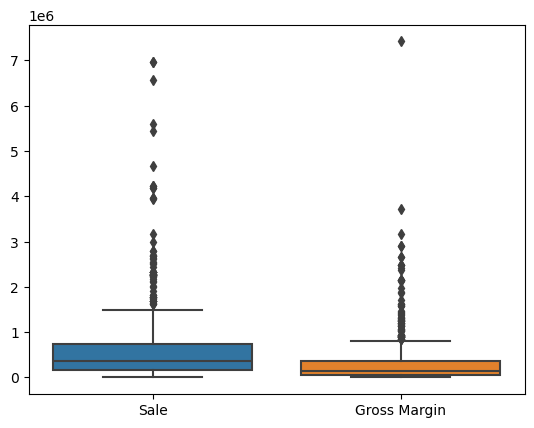

In [658]:
sns.boxplot(data)
plt.show()

In [659]:
#Imputing missing values in Gross Margin with median since it has outliers
imputer = SimpleImputer(strategy='median')
data['Gross Margin']=imputer.fit_transform(data[['Gross Margin']])
data['Gross Margin'].isna().sum()

0

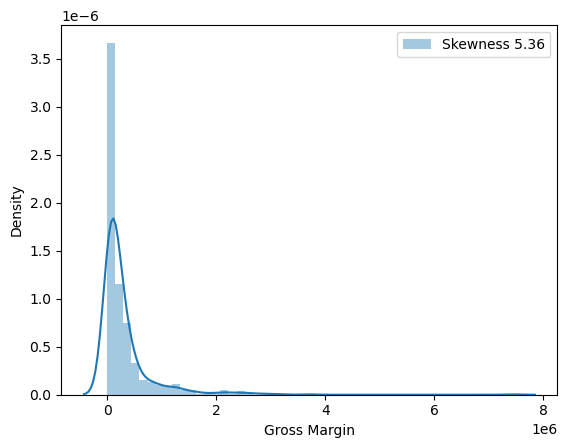

In [660]:
#Distplot of Gross Margin column
sns.distplot(data['Gross Margin'], label='Skewness %.2f' %(data['Gross Margin'].skew()))
plt.legend(loc='best')
plt.show()

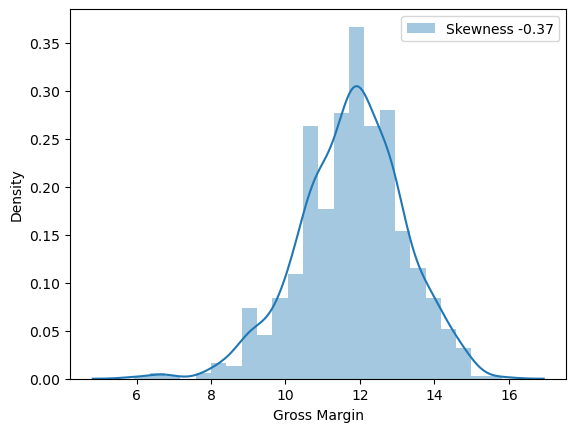

In [661]:
#Apply log tranformation to reduce skewness
data['Gross Margin'] = np.log(1+data['Gross Margin'])

sns.distplot(data['Gross Margin'], label='Skewness %.2f' %(data['Gross Margin'].skew()))
plt.legend(loc='best')
plt.show()

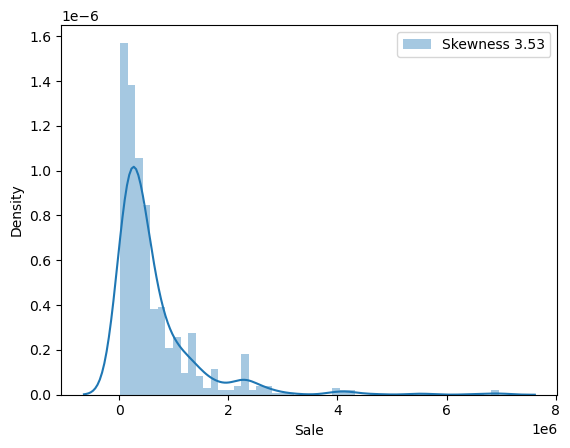

In [662]:
#Distplot of Sale column
sns.distplot(data['Sale'], label='Skewness %.2f' %(data['Sale'].skew()))
plt.legend(loc='best')
plt.show()

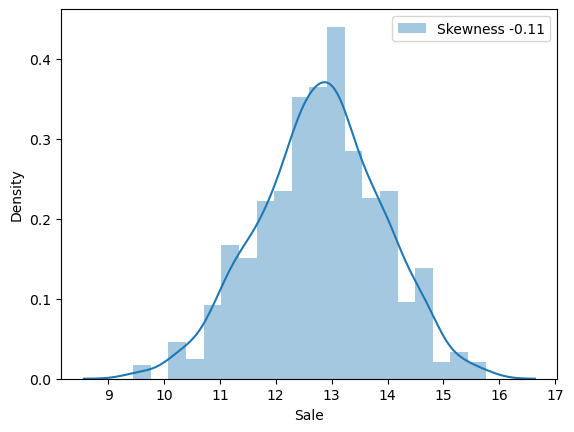

In [663]:
data['Sale'] = np.log(1+data['Sale'])

sns.distplot(data['Sale'], label='Skewness %.2f' %(data['Sale'].skew()))
plt.legend(loc='best')
plt.show()

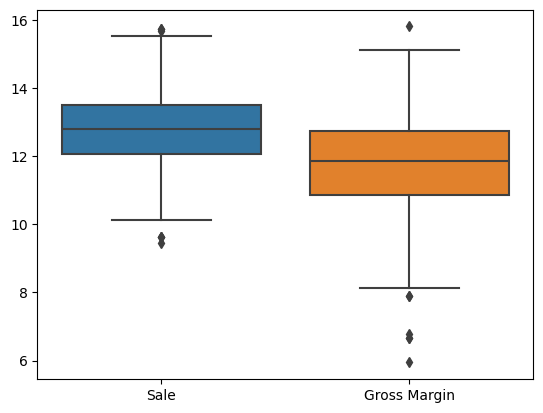

In [664]:
sns.boxplot(data)
plt.show()

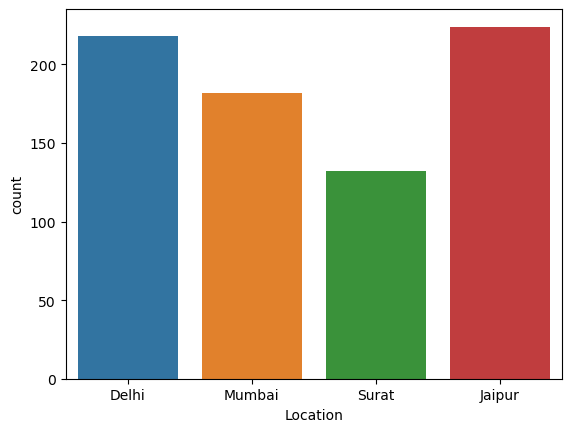

In [665]:
#Countplot of location
sns.countplot(x=data['Location'])
plt.show()

In [666]:
# Rename 'BtoB/BtoC' to 'Business_Type'
data.rename(columns={'BtoB/BtoC': 'Business Type'}, inplace=True)
data.head()

,Month,FY,Location,Business Type,Product Code,Sale,Gross Margin
0,Apr-19,2019-20,Delhi,BtoB,E0028M,13.055894,11.265870
1,Apr-19,2019-20,Mumbai,BtoB,E0028M,12.748967,12.266892
2,Apr-19,2019-20,Surat,BtoB,E0028M,13.055894,11.826609
3,Apr-19,2019-20,Mumbai,BtoC,E0028M,9.446834,8.615677
4,Apr-19,2019-20,Delhi,BtoC,E0028M,12.427298,10.387104


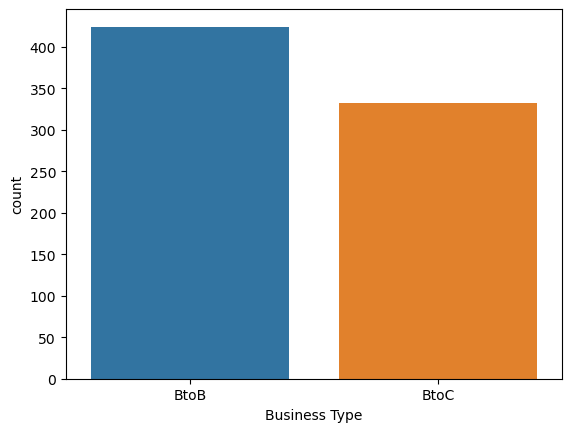

In [667]:
#Countplot of BtoB/BtoC
sns.countplot(x=data['Business Type'])
plt.show()

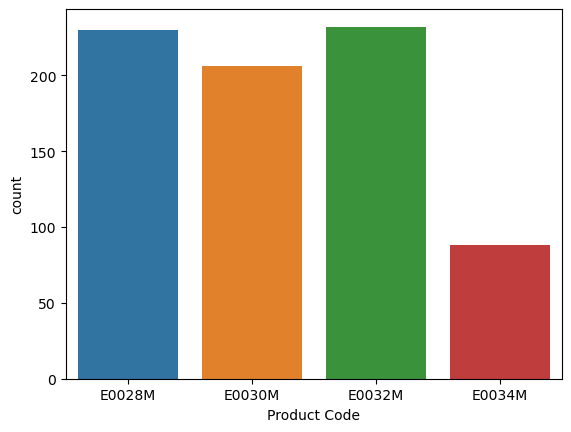

In [668]:
#Countplot of Product Code
sns.countplot(x=data['Product Code'])
plt.show()

In [669]:
data.head()

,Month,FY,Location,Business Type,Product Code,Sale,Gross Margin
0,Apr-19,2019-20,Delhi,BtoB,E0028M,13.055894,11.265870
1,Apr-19,2019-20,Mumbai,BtoB,E0028M,12.748967,12.266892
2,Apr-19,2019-20,Surat,BtoB,E0028M,13.055894,11.826609
3,Apr-19,2019-20,Mumbai,BtoC,E0028M,9.446834,8.615677
4,Apr-19,2019-20,Delhi,BtoC,E0028M,12.427298,10.387104


In [670]:
data['Month']=pd.to_datetime(data['Month'], format='%b-%y')
data['Month']=data['Month'].dt.month
data

,Month,FY,Location,Business Type,Product Code,Sale,Gross Margin
0,4,2019-20,Delhi,BtoB,E0028M,13.055894,11.265870
1,4,2019-20,Mumbai,BtoB,E0028M,12.748967,12.266892
2,4,2019-20,Surat,BtoB,E0028M,13.055894,11.826609
3,4,2019-20,Mumbai,BtoC,E0028M,9.446834,8.615677
4,4,2019-20,Delhi,BtoC,E0028M,12.427298,10.387104
...,...,...,...,...,...,...,...
751,3,2018-19,Mumbai,BtoC,E0032M,13.144094,11.649732
752,3,2018-19,Delhi,BtoC,E0032M,14.086730,12.774685
753,3,2018-19,Surat,BtoC,E0032M,14.563849,14.293256
754,3,2018-19,Jaipur,BtoB,E0034M,13.239633,12.641354


In [671]:
data.apply(lambda x:len(x.unique()))

Month             12
FY                 2
Location           4
Business Type      2
Product Code       4
Sale             413
Gross Margin     501
dtype: int64

In [672]:
# Extracting features from the 'FY' column
data['FY_Start_Year'] = data['FY'].str.split('-', expand=True)[0].astype(int)
data['FY_End_Year'] = data['FY'].str.split('-', expand=True)[1].astype(int) + 2000
#df['FY_Duration'] = df['FY_End_Year'] - df['FY_Start_Year']
del data['FY']
data

,Month,Location,Business Type,Product Code,Sale,Gross Margin,FY_Start_Year,FY_End_Year
0,4,Delhi,BtoB,E0028M,13.055894,11.265870,2019,2020
1,4,Mumbai,BtoB,E0028M,12.748967,12.266892,2019,2020
2,4,Surat,BtoB,E0028M,13.055894,11.826609,2019,2020
3,4,Mumbai,BtoC,E0028M,9.446834,8.615677,2019,2020
4,4,Delhi,BtoC,E0028M,12.427298,10.387104,2019,2020
...,...,...,...,...,...,...,...,...
751,3,Mumbai,BtoC,E0032M,13.144094,11.649732,2018,2019
752,3,Delhi,BtoC,E0032M,14.086730,12.774685,2018,2019
753,3,Surat,BtoC,E0032M,14.563849,14.293256,2018,2019
754,3,Jaipur,BtoB,E0034M,13.239633,12.641354,2018,2019


In [673]:
monthly_sales = data.groupby(['FY_Start_Year', 'FY_End_Year', 'Month'])['Sale'].sum().unstack()
monthly_sales

,Month,1,2,3,4,5,6,7,8,9,10,11,12
FY_Start_Year,FY_End_Year,,,,,,,,,,,,
2018,2019,437.376529,399.635893,376.276578,437.361929,306.893306,365.689448,364.247759,432.071338,467.390895,447.430192,478.882349,432.591866
2019,2020,415.729143,384.248752,358.607241,413.563777,294.046101,347.773687,348.816901,417.733376,443.116086,427.979973,457.303312,414.552668


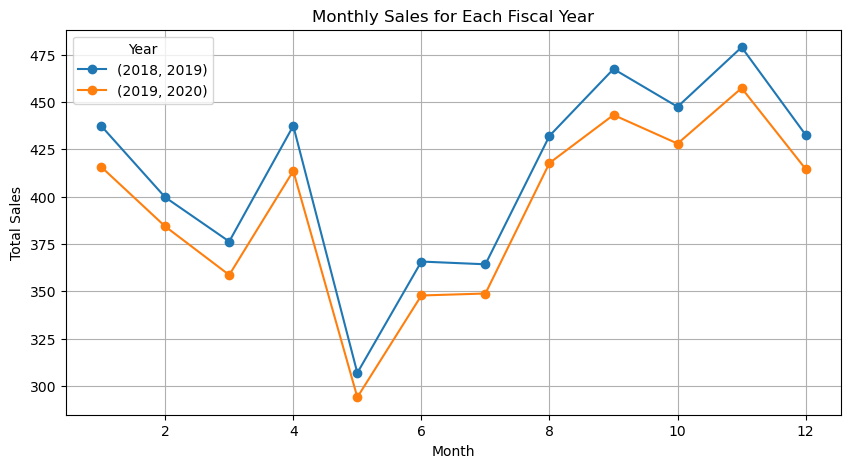

In [674]:
plt.figure(figsize=(10, 5))
for year in monthly_sales.index:
    plt.plot(monthly_sales.columns, monthly_sales.loc[year], marker='o', label=str(year))

plt.title('Monthly Sales for Each Fiscal Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

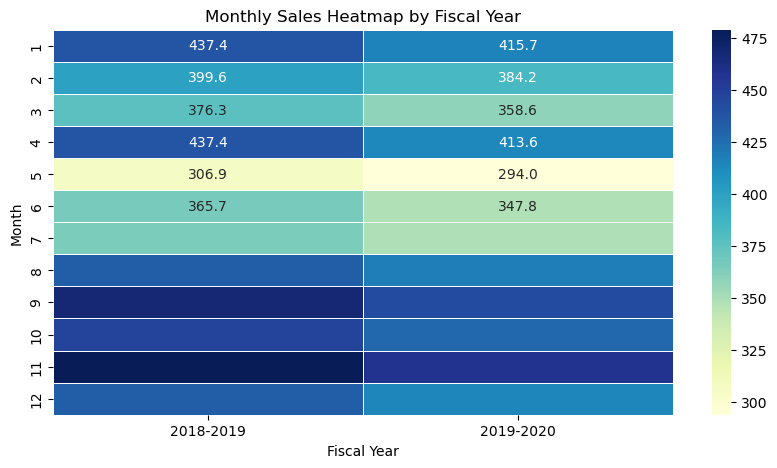

In [675]:
# Pivot for heatmap
heatmap_data = data.pivot_table(values='Sale', index='Month', columns=['FY_Start_Year', 'FY_End_Year'], aggfunc='sum', fill_value=0)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Monthly Sales Heatmap by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Month')
plt.show()

In [676]:
#Geographical Analysis

In [677]:
# Aggregate Sales by City
sales_by_loc=data.groupby('Location')['Sale'].sum().reset_index()
sales_by_loc

,Location,Sale
0,Delhi,2798.020850
1,Jaipur,2898.009233
2,Mumbai,2290.505488
3,Surat,1682.783525


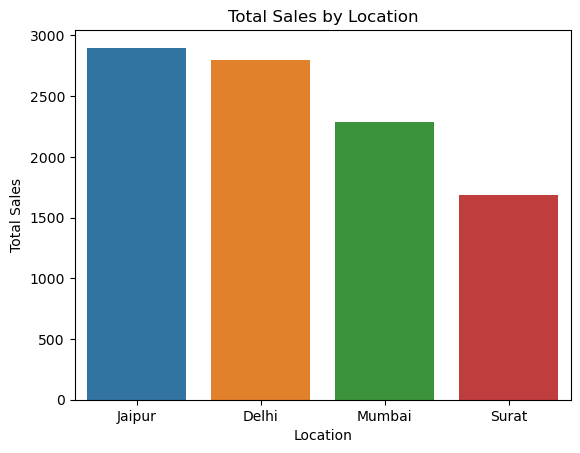

In [678]:
#Total sales by location
sns.barplot(y='Sale', x='Location', data=sales_by_loc, order=sales_by_loc.sort_values('Sale', ascending=False)['Location'])
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.show()

In [679]:
# Aggregate Gross Margin by Location
gross_by_loc=data.groupby('Location')['Gross Margin'].sum().reset_index()
gross_by_loc

,Location,Gross Margin
0,Delhi,2536.962447
1,Jaipur,2703.784500
2,Mumbai,2116.957539
3,Surat,1548.047980


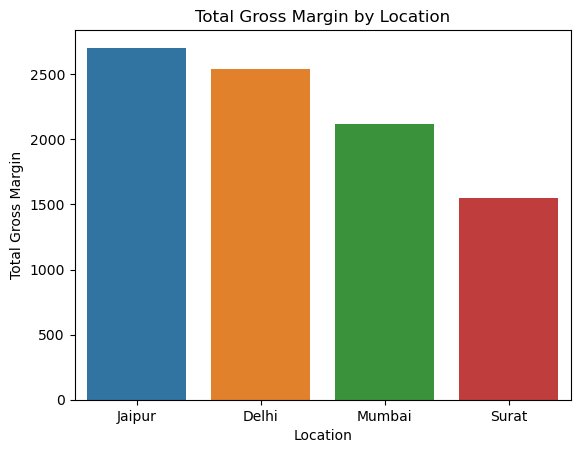

In [680]:
#Total Gross Margin by location
sns.barplot(x='Location', y='Gross Margin', data=gross_by_loc, order=gross_by_loc.sort_values('Gross Margin', ascending=False)['Location'])
plt.title('Total Gross Margin by Location')
plt.ylabel('Total Gross Margin')
plt.xlabel('Location')
plt.show()

In [681]:
# Aggregate Sales by Business Type
sales_by_buss=data.groupby('Business Type')['Sale'].sum().reset_index()
sales_by_buss

,Business Type,Sale
0,BtoB,5463.170459
1,BtoC,4206.148637


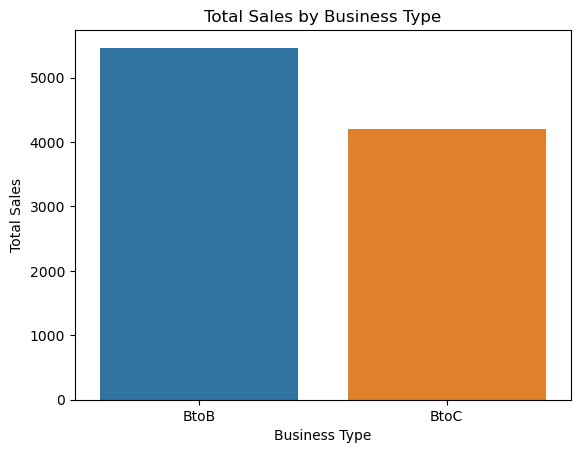

In [682]:
#Total sales by Business Type
sns.barplot(x='Business Type', y='Sale', data=sales_by_buss, order=sales_by_buss.sort_values('Sale', ascending=False)['Business Type'])
plt.title('Total Sales by Business Type')
plt.ylabel('Total Sales')
plt.xlabel('Business Type')
plt.show()

In [683]:
# Aggregate Gross Margin by Business Type
gross_by_buss=data.groupby('Business Type')['Gross Margin'].sum().reset_index()
gross_by_buss

,Business Type,Gross Margin
0,BtoB,5021.763212
1,BtoC,3883.989254


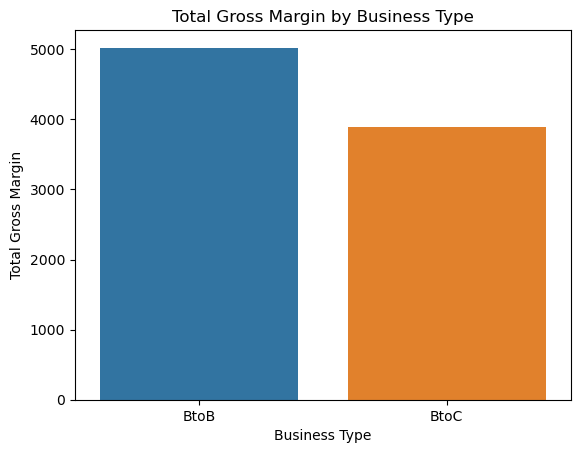

In [684]:
#Total Gross Margin by location
sns.barplot(x='Business Type', y='Gross Margin', data=gross_by_buss, order=gross_by_buss.sort_values('Gross Margin', ascending=False)['Business Type'])
plt.title('Total Gross Margin by Business Type')
plt.ylabel('Total Gross Margin')
plt.xlabel('Business Type')
plt.show()

In [685]:
# Aggregate Sales by Product
sales_by_prod=data.groupby('Product Code')['Sale'].sum().reset_index()
sales_by_prod

,Product Code,Sale
0,E0028M,2962.201444
1,E0030M,2664.010189
2,E0032M,2944.384001
3,E0034M,1098.723463


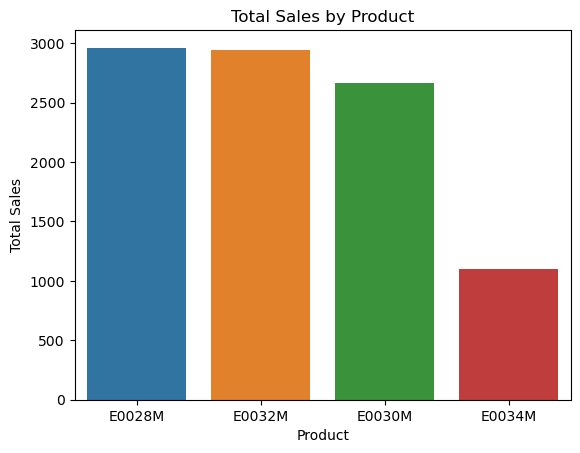

In [686]:
#Total sales by Product
sns.barplot(x='Product Code', y='Sale', data=sales_by_prod, order=sales_by_prod.sort_values('Sale', ascending=False)['Product Code'])
plt.title('Total Sales by Product')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.show()

In [687]:
# Aggregate Gross Margin by Product
gross_by_prod=data.groupby('Product Code')['Gross Margin'].sum().reset_index()
gross_by_prod

,Product Code,Gross Margin
0,E0028M,2739.805302
1,E0030M,2428.366633
2,E0032M,2708.324641
3,E0034M,1029.255891


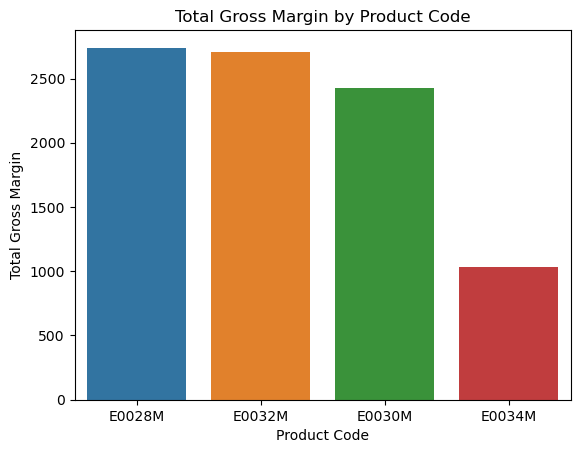

In [688]:
#Total Gross Margin by Product Code
sns.barplot(x='Product Code', y='Gross Margin', data=gross_by_prod, order=gross_by_prod.sort_values('Gross Margin', ascending=False)['Product Code'])
plt.title('Total Gross Margin by Product Code')
plt.ylabel('Total Gross Margin')
plt.xlabel('Product Code')
plt.show()

In [689]:
data.head()

,Month,Location,Business Type,Product Code,Sale,Gross Margin,FY_Start_Year,FY_End_Year
0,4,Delhi,BtoB,E0028M,13.055894,11.265870,2019,2020
1,4,Mumbai,BtoB,E0028M,12.748967,12.266892,2019,2020
2,4,Surat,BtoB,E0028M,13.055894,11.826609,2019,2020
3,4,Mumbai,BtoC,E0028M,9.446834,8.615677,2019,2020
4,4,Delhi,BtoC,E0028M,12.427298,10.387104,2019,2020


In [690]:
# Aggregate Sales for Location by FY 
sales_by_fy=data.groupby(['FY_Start_Year', 'FY_End_Year', 'Month', 'Location'])['Sale'].sum().unstack()
sales_by_fy

Location                              Delhi      Jaipur      Mumbai      Surat
FY_Start_Year FY_End_Year Month                                               
2018          2019        1      129.883829  126.498546  101.318316  79.675838
                          2      115.713755  115.193025   88.647813  80.081300
                          3      117.328538  105.161344   90.655146  63.131550
                          4      120.520406  133.811303  102.591727  80.438492
                          5       88.556733   93.620221   73.215784  51.500568
                          6      120.820512   93.360934   91.329646  60.178356
                          7      115.956065  108.318363   75.582878  64.390452
                          8      119.891386  119.818486  115.502110  76.859356
                          9      133.873266  148.802223  104.654919  80.060487
                          10     117.216271  145.450480  117.808063  66.955379
                          11     136.581311  159.847383  105.453426  77.000228
                          12     116.237019  131.573029  104.380399  80.401419
2019          2020        1      122.757575  121.974997   95.457854  75.538716
                          2      111.620333  111.387298   84.891483  76.349638
                          3      111.596673  100.687157   85.800206  60.523205
                          4      112.747448  127.496004   97.018963  76.301362
                          5       84.394922   88.072111   72.374484  49.204584
                          6      112.214872   91.396335   86.187008  57.975473
                          7      112.150327  101.241496   74.741578  60.683500
                          8      114.699355  115.607274  112.101839  75.324909
                          9      128.944220  140.552673   98.676655  74.942538
                          10     112.311922  138.704988  111.922899  65.040164
                          11     129.572827  152.789538  100.979229  73.961718
                          12     112.431286  126.644025   99.213064  76.264293

In [691]:
# Filter data for the fiscal year 2018-2019
start_year = 2018
end_year = 2019

# Extract the data for the fiscal year 2018-2019
filtered_data = sales_by_fy.loc[(start_year, end_year)]
filtered_data

Location,Delhi,Jaipur,Mumbai,Surat
Month,,,,
1,129.883829,126.498546,101.318316,79.675838
2,115.713755,115.193025,88.647813,80.081300
3,117.328538,105.161344,90.655146,63.131550
4,120.520406,133.811303,102.591727,80.438492
5,88.556733,93.620221,73.215784,51.500568
6,120.820512,93.360934,91.329646,60.178356
7,115.956065,108.318363,75.582878,64.390452
8,119.891386,119.818486,115.502110,76.859356
9,133.873266,148.802223,104.654919,80.060487


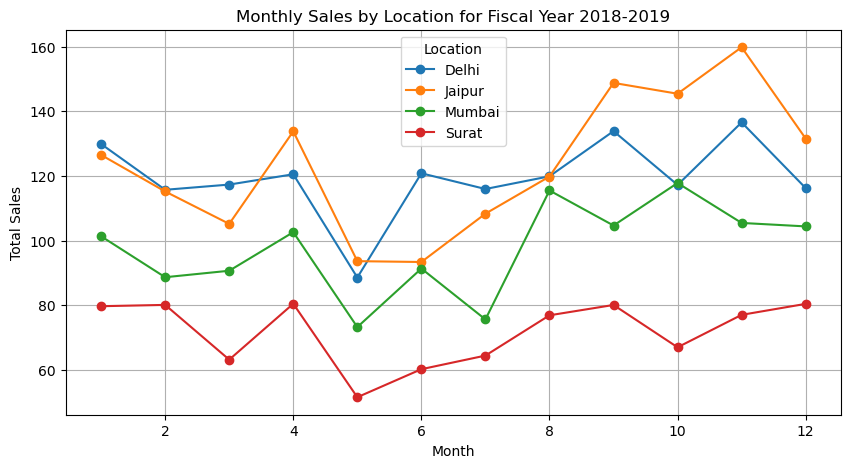

In [692]:
plt.figure(figsize=(10,5))
for location in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[location], marker='o', label=location)

plt.title('Monthly Sales by Location for Fiscal Year 2018-2019')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Location', loc='best')
plt.grid(True)
plt.show()

In [693]:
# Filter data for the fiscal year 2019-2020
start_year = 2019
end_year = 2020

# Extract the data for the fiscal year 2019-2020
filtered_data = sales_by_fy.loc[(start_year, end_year)]
filtered_data

Location,Delhi,Jaipur,Mumbai,Surat
Month,,,,
1,122.757575,121.974997,95.457854,75.538716
2,111.620333,111.387298,84.891483,76.349638
3,111.596673,100.687157,85.800206,60.523205
4,112.747448,127.496004,97.018963,76.301362
5,84.394922,88.072111,72.374484,49.204584
6,112.214872,91.396335,86.187008,57.975473
7,112.150327,101.241496,74.741578,60.683500
8,114.699355,115.607274,112.101839,75.324909
9,128.944220,140.552673,98.676655,74.942538


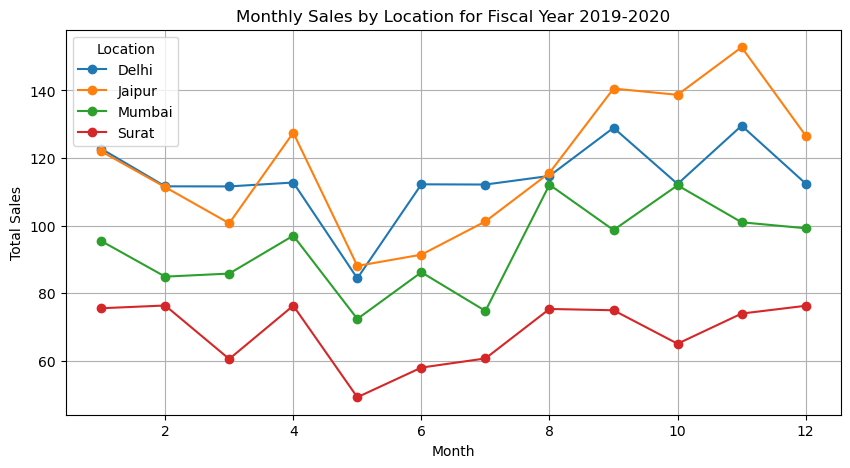

In [694]:
plt.figure(figsize=(10, 5))
for location in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[location], marker='o', label=location)

plt.title('Monthly Sales by Location for Fiscal Year 2019-2020')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Location')
plt.grid(True)
plt.show()

In [695]:
#Sales by business type for FY 2018-19
sales_by_fy=data.groupby(['FY_Start_Year', 'FY_End_Year', 'Month', 'Business Type'])['Sale'].sum().unstack()
sales_by_fy

Business Type                          BtoB        BtoC
FY_Start_Year FY_End_Year Month                        
2018          2019        1      245.236383  192.140146
                          2      231.798224  167.837669
                          3      182.866108  193.410470
                          4      241.219355  196.142573
                          5      192.141025  114.752282
                          6      210.893453  154.795995
                          7      209.037139  155.210620
                          8      251.703400  180.367938
                          9      269.198436  198.192458
                          10     252.996509  194.433684
                          11     266.947979  211.934369
                          12     237.354309  195.237558
2019          2020        1      233.323573  182.405570
                          2      222.512776  161.735976
                          3      175.336819  183.270422
                          4      230.333789  183.229988
                          5      184.891309  109.154793
                          6      200.153322  147.620364
                          7      202.168203  146.648698
                          8      242.680928  175.052448
                          9      256.044526  187.071560
                          10     240.678216  187.301757
                          11     255.415922  201.887390
                          12     228.238757  186.313911

In [696]:
# Filter data for the fiscal year 2019-2020
start_year = 2018
end_year = 2019

# Extract the data for the fiscal year 2018-2019
filtered_data = sales_by_fy.loc[(start_year, end_year)]
filtered_data

Business Type,BtoB,BtoC
Month,,
1,245.236383,192.140146
2,231.798224,167.837669
3,182.866108,193.410470
4,241.219355,196.142573
5,192.141025,114.752282
6,210.893453,154.795995
7,209.037139,155.210620
8,251.703400,180.367938
9,269.198436,198.192458


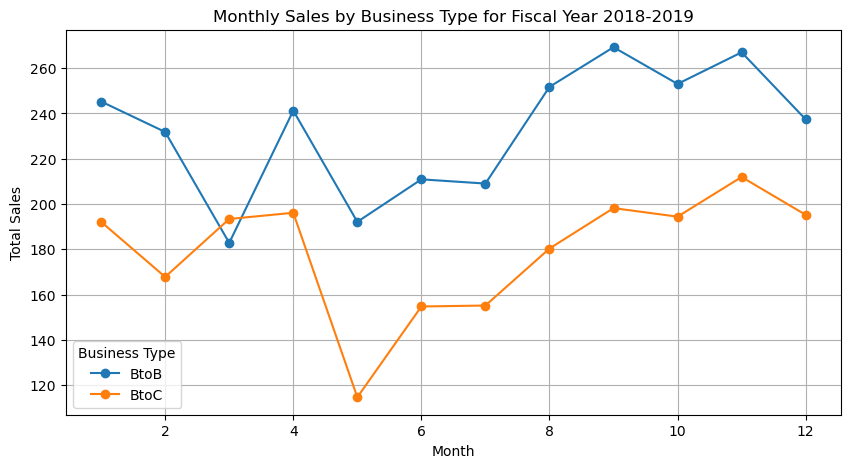

In [697]:
plt.figure(figsize=(10, 5))
for type in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[type], marker='o', label=type)

plt.title('Monthly Sales by Business Type for Fiscal Year 2018-2019')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Business Type', loc='best')
plt.grid(True)
plt.show()

In [698]:
# Filter data for the fiscal year 2019-2020
start_year = 2019
end_year = 2020

# Extract the data for the fiscal year 2018-2019
filtered_data = sales_by_fy.loc[(start_year, end_year)]
filtered_data

Business Type,BtoB,BtoC
Month,,
1,233.323573,182.405570
2,222.512776,161.735976
3,175.336819,183.270422
4,230.333789,183.229988
5,184.891309,109.154793
6,200.153322,147.620364
7,202.168203,146.648698
8,242.680928,175.052448
9,256.044526,187.071560


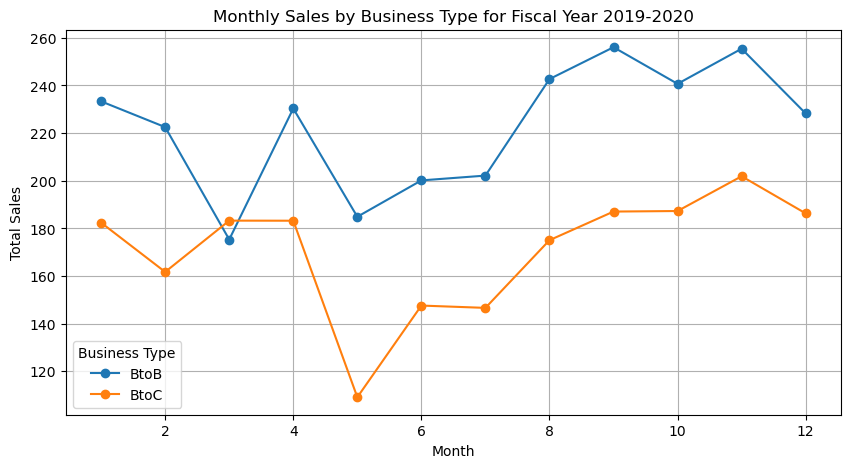

In [699]:
plt.figure(figsize=(10, 5))
for type in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[type], marker='o', label=type)

plt.title('Monthly Sales by Business Type for Fiscal Year 2019-2020')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Business Type', loc='best')
plt.grid(True)
plt.show()

In [700]:
#Sales by product for FY 2018-19
sales_by_fy=data.groupby(['FY_Start_Year', 'FY_End_Year', 'Month', 'Product Code'])['Sale'].sum().unstack()
sales_by_fy

Product Code                         E0028M      E0030M      E0032M     E0034M
FY_Start_Year FY_End_Year Month                                               
2018          2019        1      154.738897  156.760032   89.446736  36.430864
                          2      156.818337  129.867315   76.401584  36.548657
                          3       73.868207  119.137455  158.112887  25.158031
                          4      160.260373   78.115042  144.998540  53.987974
                          5      100.103498   78.232819   77.564734  50.992255
                          6      121.381596   79.436789  114.795097  50.075965
                          7      129.865153   75.735504  104.882269  53.764833
                          8      145.866101   80.318965  154.894019  50.992253
                          9       97.407671  164.032419  154.553092  51.397712
                          10     158.140089  119.861603  118.136134  51.292366
                          11     107.536551  163.326843  158.412991  49.605964
                          12     108.284228  119.519975  152.984476  51.803187
2019          2020        1      148.661905  148.603567   83.493167  34.970504
                          2      149.760498  126.036881   73.363083  35.088290
                          3       70.829721  112.729038  150.649570  24.398912
                          4      153.106546   73.284780  136.461294  50.711156
                          5       97.708737   73.690238   73.545393  49.101733
                          6      113.586889   75.299668  111.394818  47.492311
                          7      124.242975   74.201060   99.191705  51.181161
                          8      140.742469   76.587299  150.608735  49.794872
                          9       91.741782  155.470472  147.495248  48.408584
                          10     152.873994  113.165501  113.637244  48.303234
                          11     101.676085  156.268973  151.642805  47.715449
                          12     102.999140  114.327954  147.718378  49.507196

In [701]:
# Filter data for the fiscal year 2019-2020
start_year = 2018
end_year = 2019

# Extract the data for the fiscal year 2018-2019
filtered_data = sales_by_fy.loc[(start_year, end_year)]
filtered_data

Product Code,E0028M,E0030M,E0032M,E0034M
Month,,,,
1,154.738897,156.760032,89.446736,36.430864
2,156.818337,129.867315,76.401584,36.548657
3,73.868207,119.137455,158.112887,25.158031
4,160.260373,78.115042,144.998540,53.987974
5,100.103498,78.232819,77.564734,50.992255
6,121.381596,79.436789,114.795097,50.075965
7,129.865153,75.735504,104.882269,53.764833
8,145.866101,80.318965,154.894019,50.992253
9,97.407671,164.032419,154.553092,51.397712


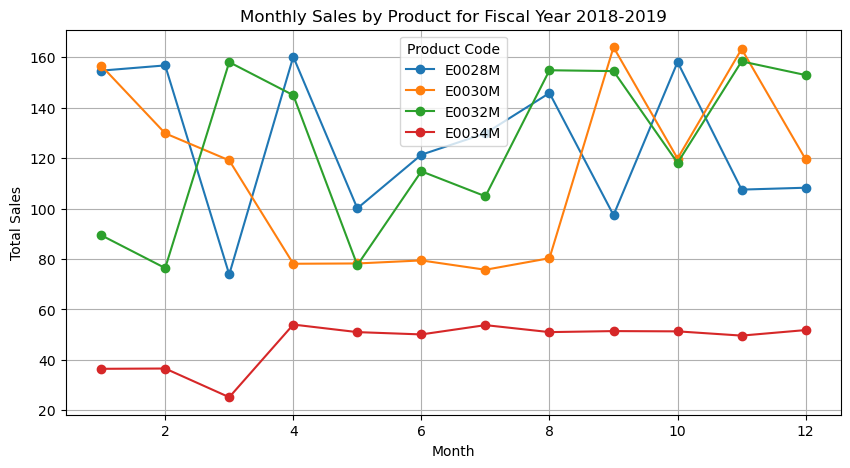

In [702]:
plt.figure(figsize=(10, 5))
for prod in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[prod], marker='o', label=prod)

plt.title('Monthly Sales by Product for Fiscal Year 2018-2019')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Code', loc='best')
plt.grid(True)
plt.show()

In [703]:
# Filter data for the fiscal year 2019-2020
start_year = 2019
end_year = 2020

# Extract the data for the fiscal year 2018-2019
filtered_data = sales_by_fy.loc[(start_year, end_year)]
filtered_data

Product Code,E0028M,E0030M,E0032M,E0034M
Month,,,,
1,148.661905,148.603567,83.493167,34.970504
2,149.760498,126.036881,73.363083,35.088290
3,70.829721,112.729038,150.649570,24.398912
4,153.106546,73.284780,136.461294,50.711156
5,97.708737,73.690238,73.545393,49.101733
6,113.586889,75.299668,111.394818,47.492311
7,124.242975,74.201060,99.191705,51.181161
8,140.742469,76.587299,150.608735,49.794872
9,91.741782,155.470472,147.495248,48.408584


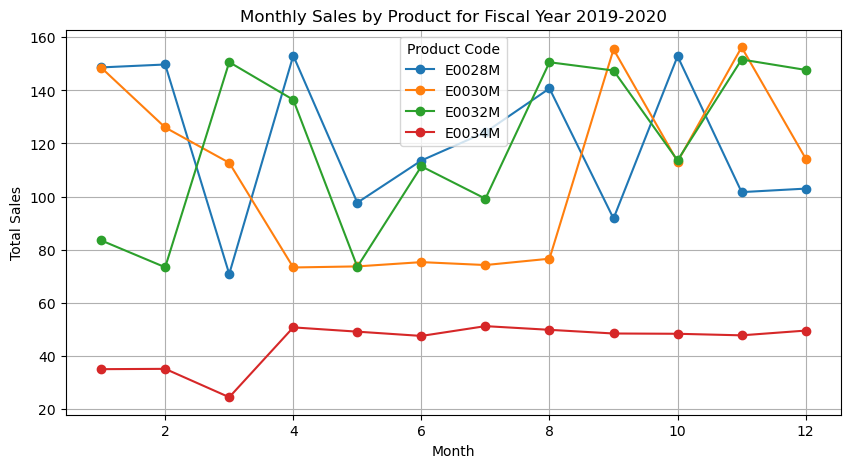

In [704]:
plt.figure(figsize=(10, 5))
for prod in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[prod], marker='o', label=prod)

plt.title('Monthly Sales by Product for Fiscal Year 2019-2020')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Code', loc='best')
plt.grid(True)
plt.show()

In [705]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = numeric_columns.tolist()
corr = data[num_cols].corr()
display (corr)

,Sale,Gross Margin
Sale,1.000000,0.744655
Gross Margin,0.744655,1.000000


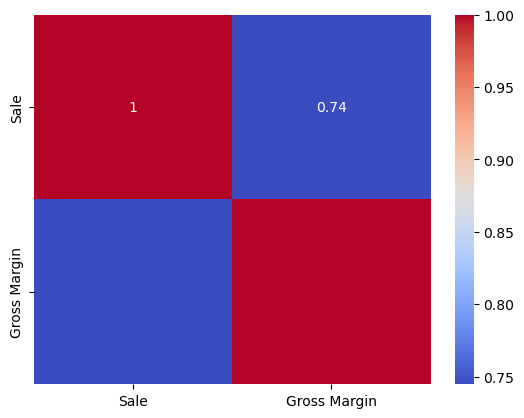

In [706]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [707]:
# Label Encoding

In [708]:
data.head()

,Month,Location,Business Type,Product Code,Sale,Gross Margin,FY_Start_Year,FY_End_Year
0,4,Delhi,BtoB,E0028M,13.055894,11.265870,2019,2020
1,4,Mumbai,BtoB,E0028M,12.748967,12.266892,2019,2020
2,4,Surat,BtoB,E0028M,13.055894,11.826609,2019,2020
3,4,Mumbai,BtoC,E0028M,9.446834,8.615677,2019,2020
4,4,Delhi,BtoC,E0028M,12.427298,10.387104,2019,2020


In [709]:
data.apply(lambda x:len(x.unique()))

Month             12
Location           4
Business Type      2
Product Code       4
Sale             413
Gross Margin     501
FY_Start_Year      2
FY_End_Year        2
dtype: int64

In [710]:
#cat_col = ['Month']
le = LabelEncoder()
#for col in cat_col:
data=le.fit_transform(data['Month'])
data

,Month,Location,Business Type,Product Code,Sale,Gross Margin,FY_Start_Year,FY_End_Year
0,3,Delhi,BtoB,E0028M,13.055894,11.265870,2019,2020
1,3,Mumbai,BtoB,E0028M,12.748967,12.266892,2019,2020
2,3,Surat,BtoB,E0028M,13.055894,11.826609,2019,2020
3,3,Mumbai,BtoC,E0028M,9.446834,8.615677,2019,2020
4,3,Delhi,BtoC,E0028M,12.427298,10.387104,2019,2020
...,...,...,...,...,...,...,...,...
751,2,Mumbai,BtoC,E0032M,13.144094,11.649732,2018,2019
752,2,Delhi,BtoC,E0032M,14.086730,12.774685,2018,2019
753,2,Surat,BtoC,E0032M,14.563849,14.293256,2018,2019
754,2,Jaipur,BtoB,E0034M,13.239633,12.641354,2018,2019


In [711]:
#One hot encoding

In [712]:
data=pd.get_dummies(data, columns=['Business Type', 'Location', 'Product Code', 'FY_Start_Year', 'FY_End_Year'] ,dtype = int )
display (data.head())

,Month,Sale,Gross Margin,Business Type_BtoB,Business Type_BtoC,Location_Delhi,Location_Jaipur,Location_Mumbai,Location_Surat,Product Code_E0028M,Product Code_E0030M,Product Code_E0032M,Product Code_E0034M,FY_Start_Year_2018,FY_Start_Year_2019,FY_End_Year_2019,FY_End_Year_2020
0,3,13.055894,11.265870,1,0,1,0,0,0,1,0,0,0,0,1,0,1
1,3,12.748967,12.266892,1,0,0,0,1,0,1,0,0,0,0,1,0,1
2,3,13.055894,11.826609,1,0,0,0,0,1,1,0,0,0,0,1,0,1
3,3,9.446834,8.615677,0,1,0,0,1,0,1,0,0,0,0,1,0,1
4,3,12.427298,10.387104,0,1,1,0,0,0,1,0,0,0,0,1,0,1


In [713]:
data.dtypes

Month                    int64
Sale                   float64
Gross Margin           float64
Business Type_BtoB       int32
Business Type_BtoC       int32
Location_Delhi           int32
Location_Jaipur          int32
Location_Mumbai          int32
Location_Surat           int32
Product Code_E0028M      int32
Product Code_E0030M      int32
Product Code_E0032M      int32
Product Code_E0034M      int32
FY_Start_Year_2018       int32
FY_Start_Year_2019       int32
FY_End_Year_2019         int32
FY_End_Year_2020         int32
dtype: object

In [714]:
#Normalizing data and creating the independent varibales
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nor=data.drop(columns=['Sale'])
X=pd.DataFrame(scaler.fit_transform(nor), columns=nor.columns)
X

,Month,Gross Margin,Business Type_BtoB,Business Type_BtoC,Location_Delhi,Location_Jaipur,Location_Mumbai,Location_Surat,Product Code_E0028M,Product Code_E0030M,Product Code_E0032M,Product Code_E0034M,FY_Start_Year_2018,FY_Start_Year_2019,FY_End_Year_2019,FY_End_Year_2020
0,0.272727,0.538961,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.272727,0.640315,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.272727,0.595736,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.272727,0.270627,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.272727,0.449985,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.181818,0.577827,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
752,0.181818,0.691729,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
753,0.181818,0.845485,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
754,0.181818,0.678229,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [715]:
#Dependent variable
Y=data['Sale']
Y.head()

0    13.055894
1    12.748967
2    13.055894
3     9.446834
4    12.427298
Name: Sale, dtype: float64

In [716]:
#Train Test Split 
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(756, 16) (756,)
(604, 16) (604,)
(152, 16) (152,)


In [717]:
#Decision Tree Regression

In [718]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

#Prediction with Test Data 
y_pred=dtr.predict(X_test)
y_pred

array([13.09646899, 13.64982072, 12.79214228, 13.47022903, 15.19245743,
       11.25547511, 12.52238226, 14.21977251, 11.75073534, 13.0833668 ,
       13.08802242, 12.5512108 , 13.80586115, 12.35068801, 13.26843062,
       12.33597308, 13.71595428, 12.91503412, 13.55060056, 12.20959145,
       12.33597308, 14.56384899, 13.10805936, 13.74545391, 12.13329225,
       14.39173435, 11.89417301, 15.25453478, 13.65657227, 13.81519401,
       12.63974743, 14.13123037, 12.9412733 , 11.03298947, 11.28925678,
       12.06557994, 13.04383303, 11.64785838, 12.85744399, 13.65657227,
       12.63326924, 13.43867081, 11.81797337, 11.28925678, 11.47165545,
       10.3094542 , 13.76506249, 11.94660349, 12.7736591 , 12.13329225,
       12.85744399, 14.33824441, 11.99874708, 11.1739901 , 12.37538052,
       12.52238226, 13.26697614, 14.6252374 , 13.9375025 , 13.98626952,
       13.10577759, 12.36569369, 13.20904623, 12.4280164 , 12.00709016,
       13.9375025 , 12.20311327, 14.80345114, 13.90219248, 12.69

In [719]:
result=pd.DataFrame({'Predicted': y_pred, 'Actual': Y_test})
result.head()

,Predicted,Actual
650,13.096469,13.121162
734,13.649821,13.988206
404,12.792142,13.459275
79,13.470229,13.470229
422,15.192457,14.462585


In [720]:
#Accuracy and Mean Absolute Error 
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y_test, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.640564495124416
Mean Absolute Error 0.40673596498105313


In [721]:
#Random Forest Regression

In [722]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,Y_train)
rfr

RandomForestRegressor()

In [723]:
#Prediction with Test Data 
y_pred=rfr.predict(X_test)
y_pred

array([12.67145235, 12.53731769, 12.91333705, 13.4498598 , 13.85539945,
       11.77169718, 12.99392466, 13.50583594, 11.91578213, 13.09113359,
       12.57315296, 12.64100709, 13.75311771, 12.09811881, 13.12811025,
       12.6795261 , 13.27759043, 13.30956659, 13.60663218, 12.16169018,
       11.83352558, 14.65228163, 13.83625188, 14.00559946, 12.4264203 ,
       13.96287112, 12.01996589, 14.47820362, 13.74021677, 13.21294064,
       12.39200865, 13.60983703, 12.45760413, 11.51284192, 11.42435698,
       12.30123848, 12.8994212 , 11.85724341, 13.00319454, 13.56970481,
       12.43496931, 13.2168237 , 12.11828853, 11.41646182, 11.46959329,
       11.75297968, 12.72305386, 13.0025094 , 12.95955041, 12.3558794 ,
       12.83887643, 14.19157666, 12.09823486, 12.06967612, 11.99934503,
       12.36573121, 13.7503773 , 13.70029355, 13.74533584, 13.94951291,
       13.43838145, 12.5534477 , 13.4399069 , 12.2337246 , 12.33281286,
       13.78868459, 12.00030256, 14.77861776, 13.95450936, 12.74

In [724]:
result=pd.DataFrame({'Predicted': y_pred, 'Actual': Y_test})
result.head()

,Predicted,Actual
650,12.671452,13.121162
734,12.537318,13.988206
404,12.913337,13.459275
79,13.449860,13.470229
422,13.855399,14.462585


In [725]:
#Accuracy and Mean Absolute Error of test data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y_test, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.7755769632165067
Mean Absolute Error 0.3461692216223042


In [726]:
#Extra Tree Regression

In [727]:
#from sklearn.ensemble import  ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators = 120)
etr.fit(X_train,Y_train)
etr

ExtraTreesRegressor(n_estimators=120)

In [728]:
#Prediction with Test Data 
y_pred=etr.predict(X_test)
y_pred

array([12.69603742, 12.88921596, 12.82865533, 13.46889842, 13.63151164,
       11.39345827, 13.27282362, 13.31997395, 11.70144739, 13.06645214,
       12.46688136, 12.90887888, 13.67495099, 12.16752725, 13.26479996,
       12.82284821, 13.72075792, 12.93060117, 13.20442503, 12.34946505,
       12.12157576, 14.60574882, 14.09699895, 14.37211942, 12.86844694,
       13.68437261, 11.96200989, 14.45533898, 13.84607845, 12.94674135,
       12.27379148, 13.64078463, 12.50764279, 11.22204946, 11.31336025,
       12.46549596, 12.87763605, 11.88680651, 13.00429734, 13.60512036,
       12.54428528, 13.42093291, 12.48404149, 11.29533673, 11.39017401,
       11.76929987, 12.61123078, 12.47997055, 13.19159254, 12.3489475 ,
       13.20536561, 13.92487558, 11.80956224, 11.84820333, 12.12148251,
       12.51013716, 13.76979429, 13.7146071 , 13.94720602, 13.89915416,
       13.52277119, 13.25940459, 13.19696171, 12.40135584, 12.42773706,
       13.92846374, 12.18237746, 14.32801683, 13.91022383, 12.74

In [729]:
#Accuracy and Mean Absolute Error of test data
from sklearn.metrics import r2_score,mean_absolute_error
print ('R2 Score ', r2_score(Y_test, y_pred))
print ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.792694489431722
Mean Absolute Error 0.3078522024741776
